### Load cleaned data and pre-defined classes

In [2]:
from data_clean import Data_to_Clean,Data_to_Analyze
import pickle
import pandas as pd
import copy
import json

MBTI_types=[
    'istj', 'isfj', 'infj', 'intj', 
    'istp', 'isfp', 'infp', 'intp', 
    'estp', 'esfp', 'enfp', 'entp', 
    'estj', 'esfj', 'enfj', 'entj'
    ]
cleaned_data=dict.fromkeys(MBTI_types, None)

for type in cleaned_data.keys():
    file_path=f"Data\\cleaned_data\\{type}_cleaned.pkl" 
    try:
        with open(file_path, 'rb') as f:
            cleaned_data[type] = pickle.load(f)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except pickle.UnpicklingError:
        print(f"Error: Could not unpickle the file {file_path}. It might be corrupted or not a valid pickle file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


  0%|          | 0/16 [00:00<?, ?it/s]

istj : {'neg': 0.08389427164649711, 'neu': 0.7228111195098118, 'pos': 0.15391961013073654, 'compound': 0.09938239151248017}


KeyboardInterrupt: 

In [ ]:
infp=cleaned_data["infp"]
infp.data.head(30)


,posts,type,vader_score
0,"[[thanks, forest], [thank], [thanks], [thank, ...",infp,"{'neg': 0.028949367088607587, 'neu': 0.6760253..."
1,"[[submission, matchstickguy], [choose, matchst...",infp,"{'neg': 0.019292035398230087, 'neu': 0.5762212..."
2,"[[acceptable, minion, meme], [feel, free, send...",infp,"{'neg': 0.10786956521739133, 'neu': 0.68515942..."
3,"[[fucking, way], [scremsing], [sayr, cute], [a...",infp,"{'neg': 0.0971764705882353, 'neu': 0.732007352..."
4,"[[mom, lose, weight], [insane], [worth, honest...",infp,"{'neg': 0.12409740259740262, 'neu': 0.71883116..."
5,"[[guy], [people, follow, account], [felt, reso...",infp,"{'neg': 0.077645, 'neu': 0.7014500000000002, '..."
6,"[[drake, album, straight, beach, hand], [tweet...",infp,"{'neg': 0.09475000000000001, 'neu': 0.6663625,..."
7,"[[thread, chick, biz, year], [incels, relate],...",infp,"{'neg': 0.06881410256410259, 'neu': 0.68692948..."
8,"[[person, follow, people, unfollowed, automati...",infp,"{'neg': 0.09469090909090912, 'neu': 0.68720909..."
9,"[[want, comfie], [nerd], [junior], [laugh, ass...",infp,"{'neg': 0.11299408284023668, 'neu': 0.67594674..."


### Visualize VADER score of all MBTI types

In [ ]:
all_vader_scores={T:cleaned_data[T].basic_identities["overall_vader_score"] for T in MBTI_types}

In [ ]:
all_vader_scores=pd.DataFrame(all_vader_scores).T

In [ ]:
all_vader_scores=all_vader_scores.sort_values(by="compound",ascending=False)
all_vader_scores

,neg,neu,pos,compound
isfj,0.074714,0.706432,0.179305,0.156459
infj,0.077386,0.706724,0.171925,0.146350
enfj,0.077268,0.706996,0.172352,0.146079
estj,0.075952,0.715335,0.168221,0.135310
esfj,0.079053,0.708754,0.163387,0.126369
enfp,0.081753,0.717179,0.163048,0.125133
intj,0.078297,0.723588,0.157496,0.117230
infp,0.086349,0.708721,0.163746,0.113087
isfp,0.086260,0.709435,0.164908,0.108508
entj,0.082541,0.718532,0.157704,0.106751


In [ ]:
all_vader_scores["compound"].describe()

count    16.000000
mean      0.113410
std       0.024352
min       0.076574
25%       0.093851
50%       0.110797
75%       0.128604
max       0.156459
Name: compound, dtype: float64

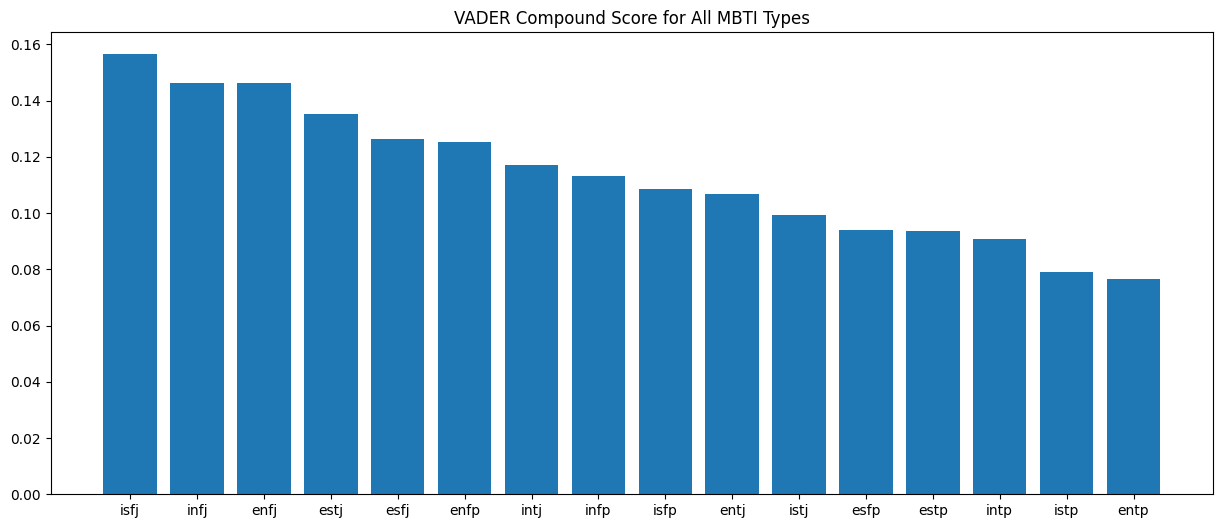

In [ ]:
import matplotlib.pyplot as plt
x=all_vader_scores.index
y=all_vader_scores["compound"]
plt.figure(figsize=(15, 6))
plt.bar(x,y)
plt.title("VADER Compound Score for All MBTI Types")
plt.show()

In [ ]:
# with open("Data/phrases.json",'r') as f:
#     phrases=json.load(f)
# phrases.keys()

dict_keys(['finding_nemo', 'viceion_rd', 'rd_monthsary', 'ano_yan', 'ion_perez', 'happy_birthdayyy', 'looking_forward', 'fran_ais', 'vice_ganda', 'stay_safe', 'social_media', 'direct_messages', 'kim_sunoo', 'park_sunghoon', 'stalker_fan', 'fan_extremely', 'extremely_devoted', 'devoted_fan', 'concept_photos', 'line_distribution', 'luc_o', 'each_other', 'safe_flight', 'makes_sense', 'moon_knight', 'don_t', 'th_grade', 'internalized_misogyny', 'red_flags', 'loid_forger', 'putang_ina', 'james_bond', 'jack_harlow', 'gon_na', 'na_lie', 'martial_law', 'years_ago', 'rhode_island', 'f_cked', 'wuthering_heights', 'worth_noting', 'paying_attention', 'human_rights', 'gun_violence', 'junction_concept', 'concept_moodboard', 'calm_down', 'ass_off', 'district_concept', 'mc_sunghoon', 'lucu_banget', 'ni_ki', 'direct_message', 'masha_allah', 'knock_knock', 'evan_hansen', 'spring_awakening', 'lea_michele', 'setting_boundaries', 'gain_weight', 'facebook_marketplace', 'halfway_through', 'mental_health', 'l

In [ ]:
# phrase_parts=set()
# for phrase in phrases.keys():
#     phrase_parts.update(phrase.split("_"))
# phrase_parts

{'fuu',
 'olivia',
 'childish',
 'delinquent',
 'svip',
 'charles',
 'qin',
 'europe',
 'cyber',
 'dose',
 'pie',
 'raise',
 'above',
 'currency',
 'paradoxxx',
 'fancams',
 'aku',
 'arson',
 'ishiguro',
 'declare',
 'correct',
 'west',
 'serving',
 'opposition',
 'jerk',
 'harbingers',
 'henry',
 'noot',
 'hearts',
 'admission',
 'wu',
 'scores',
 'pokemon',
 'wuthering',
 'cell',
 'wl',
 'imposter',
 'length',
 'speedy',
 'wheeler',
 'sensitive',
 'florence',
 'van',
 'classical',
 'martin',
 'cera',
 'yul',
 'bungou',
 'starter',
 'proportions',
 'dish',
 'contract',
 'tooru',
 'diary',
 'hustle',
 'vibration',
 'kth',
 'seed',
 'awn',
 'telescope',
 'blowing',
 'breaths',
 'guest',
 'schooler',
 'wag',
 'kong',
 'financial',
 'content',
 'sheehan',
 'prix',
 'rose',
 'conditioner',
 'civil',
 'ketanji',
 'visual',
 'teller',
 'team',
 'metal',
 'says',
 'disorders',
 'mamma',
 'follow',
 'proximity',
 'daylight',
 'falling',
 'larry',
 'streaming',
 'drake',
 'locker',
 'presave',


### Construct a dictionary for LDA modeling

In [ ]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
def constract_initial_dict():
    output = {T: {
        "corpus_overall": None,
        "corpus_specific": None,
        "original_text": [],
        "specific_initial_dict": None
    } for T in MBTI_types}
    def concatenate_post(post):
        complete_post=[]
        for sentence in post:
            complete_post.extend(sentence)
        return complete_post
    output["all_original_text"]=[]
    for T in MBTI_types:
        for i in cleaned_data[T].data.index:
            temp=concatenate_post(cleaned_data[T].data.loc[i,"posts"])
            # temp=[
            #     word for word in temp if word not in phrase_parts
            # ]
            cleaned_data[T].data.at[i,"posts"]=temp
            output[T]["original_text"].append(temp)
        output["all_original_text"].extend(output[T]["original_text"])
    # 这里加入N-gram过滤机制
    output["overall_initial_dict"]=corpora.Dictionary(output["all_original_text"])
    output["overall_initial_dict"].filter_extremes(no_above=0.2,no_below=50)
    output["overall_initial_dict"].compactify()
    print("Size of dictionary:",len(output["overall_initial_dict"]))
    output["all_corpus"]=[output["overall_initial_dict"].doc2bow(post_token) for post_token in output["all_original_text"]]
    return output
initial_dict=constract_initial_dict()
with open("Data/initial_dict.pkl",'wb') as f:
    pickle.dump(initial_dict,f)


INFO : adding document #0 to Dictionary<0 unique tokens: []>
INFO : built Dictionary<149078 unique tokens: ['aagaw', 'acct', 'actor', 'admire', 'ahh']...> from 7811 documents (total 2569580 corpus positions)
INFO : Dictionary lifecycle event {'msg': "built Dictionary<149078 unique tokens: ['aagaw', 'acct', 'actor', 'admire', 'ahh']...> from 7811 documents (total 2569580 corpus positions)", 'datetime': '2025-05-29T23:18:54.123796', 'gensim': '4.3.3', 'python': '3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'created'}
INFO : discarding 145404 tokens: [('aagaw', 2), ('althea', 3), ('alwayss', 4), ('ano_yan', 8), ('api', 15), ('asawa', 4), ('beautiful', 2160), ('benigno', 2), ('best', 4372), ('break', 2489)]...
INFO : keeping 3674 tokens which were in no less than 50 and no more than 1562 (=20.0%) documents
INFO : resulting dictionary: Dictionary<3674 unique tokens: ['acct', 'actor', 'admire', 'ahh', 'at

Size of dictionary: 3674


In [ ]:
def check_corpus(corpus,dict):
    result=pd.DataFrame(
        [
            list(range(len(dict))),
            [0]*len(dict)
        ]
    ).T
    result.columns=["word","frequency"]
    for post in corpus:
        for word_tuple in post:
            result.loc[word_tuple[0],"frequency"]+=word_tuple[1]
            #result.loc[word_tuple[0],"word"]=initial_dict["overall_initial_dict"][word_tuple[0]]
    for i in result.index:
        result.loc[i,"word"]=dict[i]
    result=result.sort_values(by="frequency",ascending=False)
    result.to_csv(r"Data\id2word_result.csv")
check_corpus(initial_dict["all_corpus"],initial_dict["overall_initial_dict"])

C:\Users\DominicMin\AppData\Local\Temp\ipykernel_48744\273948434.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'acct' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[i,"word"]=dict[i]


In [ ]:
initial_dict["overall_initial_dict"][266]

'rhe'

### Create a class for modeling

In [ ]:
with open("Data/initial_dict.pkl","rb") as f:
    initial_dict=pickle.load(f)
import gensim.corpora as corpora
import gensim
from tqdm import tqdm
from gensim.models import LdaMulticore,CoherenceModel
def optimize_topic_num(
  start,
  end,
  step,
  dict=initial_dict["overall_initial_dict"],
  corpus=initial_dict["all_corpus"],
  text=initial_dict["all_original_text"]      
):
  output=pd.Series({},dtype=float)
  topic_num_range = range(start, end+1, step)
  for topic_num in tqdm(topic_num_range, desc="计算全局模型主题数"):
  # 训练 LDA 模型 (在所有帖子数据上)
    temp_lda_model = LdaMulticore(
        corpus=corpus,    # 使用所有帖子的词袋语料
        id2word=dict,         # 使用全局词典
        num_topics=topic_num,
        random_state=100,
        chunksize=2500,
        passes=5,
        alpha="asymmetric",
        eta="auto",
        per_word_topics=False,
        workers=None                     
    )

    # 计算 Coherence (C_v) 分数 (评估全局模型在所有数据上的性能)
    temp_chmodel = CoherenceModel(
        model=temp_lda_model,
        texts=text,
        dictionary=dict,
        coherence="c_v"
    )
    output[topic_num] = temp_chmodel.get_coherence()
  print(output)
    

In [ ]:
optimize_topic_num(14,35,7)

计算全局模型主题数:   0%|          | 0/4 [00:00<?, ?it/s]INFO : using asymmetric alpha [0.16027838, 0.1264762, 0.10444838, 0.088955395, 0.077464916, 0.06860333, 0.061561063, 0.055830006, 0.05107514, 0.04706662, 0.043641515, 0.040681098, 0.0380968, 0.03582123]
INFO : using serial LDA version on this node
INFO : running online LDA training, 14 topics, 5 passes over the supplied corpus of 7811 documents, updating every 52500 documents, evaluating every ~7811 documents, iterating 50x with a convergence threshold of 0.001000
INFO : training LDA model using 21 processes
INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2500/7811, outstanding queue size 1
INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #5000/7811, outstanding queue size 2
INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #7500/7811, outstanding queue size 3
INFO : PROGRESS: pass 0, dispatched chunk #3 = documents up to #7811/7811, outstanding queue size 4
INFO : topic #13 (0.036): 0.005*"early

14    0.303128
21    0.306115
28    0.291877
35    0.279454
dtype: float64


In [ ]:
optimize_topic_num(25,31,1)

计算全局模型主题数:   0%|          | 0/7 [00:00<?, ?it/s]INFO : using asymmetric alpha [0.106478095, 0.08873175, 0.07605579, 0.06654881, 0.0591545, 0.053239048, 0.048399135, 0.044365875, 0.040953115, 0.038027894, 0.0354927, 0.033274405, 0.03131709, 0.02957725, 0.028020551, 0.026619524, 0.025351929, 0.024199568, 0.023147414, 0.022182938, 0.021295618, 0.020476557, 0.019718166, 0.019013947, 0.018358292]
INFO : using serial LDA version on this node
INFO : running online LDA training, 25 topics, 5 passes over the supplied corpus of 7811 documents, updating every 52500 documents, evaluating every ~7811 documents, iterating 50x with a convergence threshold of 0.001000
INFO : training LDA model using 21 processes
INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2500/7811, outstanding queue size 1
INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #5000/7811, outstanding queue size 2
INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #7500/7811, outstanding queue s

25    0.363590
26    0.360692
27    0.355376
28    0.374618
29    0.371481
30    0.385313
31    0.375742
dtype: float64


In [ ]:
import logging
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)

lda_model = LdaMulticore(
    corpus=initial_dict["all_corpus"],
    id2word=initial_dict["overall_initial_dict"],
    num_topics=14,
    random_state=100,
    chunksize=2500,
    passes=100,
    alpha="asymmetric",
    eta="auto",
    per_word_topics=False,
    workers=None,
    eval_every=10 # 每 10 次迭代计算一次困惑度/一致性，用于监控
)

INFO : using asymmetric alpha [0.16027838, 0.1264762, 0.10444838, 0.088955395, 0.077464916, 0.06860333, 0.061561063, 0.055830006, 0.05107514, 0.04706662, 0.043641515, 0.040681098, 0.0380968, 0.03582123]
INFO : using serial LDA version on this node
INFO : running online LDA training, 14 topics, 100 passes over the supplied corpus of 7811 documents, updating every 52500 documents, evaluating every ~7811 documents, iterating 50x with a convergence threshold of 0.001000
INFO : training LDA model using 21 processes
INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2500/7811, outstanding queue size 1
INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #5000/7811, outstanding queue size 2
INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #7500/7811, outstanding queue size 3
INFO : PROGRESS: pass 0, dispatched chunk #3 = documents up to #7811/7811, outstanding queue size 4
INFO : topic #13 (0.036): 0.002*"season" + 0.002*"photo" + 0.002*"scream" + 0.002*"b

In [ ]:
# 获取所有主题的词语和权重
all_topics_words = lda_model.show_topics(num_topics=-1, num_words=20, formatted=False)

print("\nTopic-Word Distribution (Structured):")
for topic_id, topic_words_with_weights in all_topics_words:
    print(f"Topic {topic_id}:")
    for word, weight in topic_words_with_weights:
        print(f"  {word}: {weight:.4f}")
    print()


Topic-Word Distribution (Structured):
Topic 0:
  moot: 0.0118
  bestie: 0.0088
  gm: 0.0080
  gt_gt: 0.0072
  hii: 0.0065
  interact: 0.0056
  gn: 0.0055
  friends_forever: 0.0044
  hehe: 0.0041
  aye: 0.0041
  hiii: 0.0040
  fav: 0.0038
  yay: 0.0037
  hug: 0.0036
  yesss: 0.0035
  luck: 0.0035
  aww: 0.0034
  sweet: 0.0033
  bae: 0.0032
  direct_message: 0.0031

Topic 1:
  draw: 0.0086
  anime: 0.0064
  genshin: 0.0059
  pull: 0.0049
  main: 0.0038
  chapter: 0.0036
  kazuha: 0.0034
  lrt: 0.0034
  fic: 0.0033
  manga: 0.0032
  base: 0.0029
  insane: 0.0028
  save: 0.0026
  card: 0.0024
  xiao: 0.0024
  star: 0.0023
  kin: 0.0022
  diluc: 0.0022
  dead: 0.0022
  event: 0.0022

Topic 2:
  photo: 0.0196
  list: 0.0105
  concert: 0.0096
  ticket: 0.0093
  tonight: 0.0060
  weekend: 0.0058
  tour: 0.0056
  episode: 0.0055
  email: 0.0052
  update: 0.0048
  cover: 0.0047
  event: 0.0046
  yesterday: 0.0046
  excited: 0.0046
  pm: 0.0045
  order: 0.0045
  sell: 0.0044
  set: 0.0041
  pay:

In [ ]:
chmodel = CoherenceModel(
        model=lda_model,
        texts=initial_dict["all_original_text"],
        dictionary=initial_dict["overall_initial_dict"],
        coherence="c_v"
    )
chmodel.get_coherence()

INFO : using ParallelWordOccurrenceAccumulator<processes=21, batch_size=64> to estimate probabilities from sliding windows
INFO : 1 batches submitted to accumulate stats from 64 documents (25600 virtual)
INFO : 2 batches submitted to accumulate stats from 128 documents (48681 virtual)
INFO : 3 batches submitted to accumulate stats from 192 documents (67358 virtual)
INFO : 4 batches submitted to accumulate stats from 256 documents (93402 virtual)
INFO : 5 batches submitted to accumulate stats from 320 documents (118192 virtual)
INFO : 6 batches submitted to accumulate stats from 384 documents (141584 virtual)
INFO : 7 batches submitted to accumulate stats from 448 documents (161963 virtual)
INFO : 8 batches submitted to accumulate stats from 512 documents (182950 virtual)
INFO : 9 batches submitted to accumulate stats from 576 documents (203189 virtual)
INFO : 10 batches submitted to accumulate stats from 640 documents (226910 virtual)
INFO : 11 batches submitted to accumulate stats fro

0.46199278767752